In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
cd "/gdrive/MyDrive/Health Insurance Lead Prediction"

/gdrive/MyDrive/Health Insurance Lead Prediction


In [ ]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

# Data Reading & Understanding

In [ ]:
# reading csv file

customer_df = pd.read_csv("train_Df64byy.csv")
print(customer_df.shape)
customer_df.head()

(50882, 14)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
# columns
customer_df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [ ]:
# checking info
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

- there are some missing values present. 

- looks like some variables are categorical, need to correct data-type.

In [ ]:
# changing data-types
# ID, Region_Code, Holding_Policy_Type,Reco_Policy_Cat

change_type_list = ['ID', 'Region_Code', 'Holding_Policy_Type','Reco_Policy_Cat']

for i in change_type_list:
  customer_df[i] = customer_df[i].astype('object')

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  object 
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  object 
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  object 
 11  Reco_Policy_Cat          50882 non-null  object 
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(1), int64(3

In [ ]:
# checking for duplicate values

customer_df.duplicated().sum()

0

No Duplicate records present.

In [ ]:
# checking for stastical analysis

customer_df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,Upper_Age,Lower_Age,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000
mean,44.856275,42.738866,14183.950069,0.239947
std,17.310271,17.319375,6590.074873,0.427055
min,18.000000,16.000000,2280.000000,0.000000
25%,28.000000,27.000000,9248.000000,0.000000
50%,44.000000,40.000000,13178.000000,0.000000
75%,59.000000,57.000000,18096.000000,0.000000
90%,70.000000,69.000000,23167.200000,1.000000
95%,75.000000,74.000000,26852.000000,1.000000
99%,75.000000,75.000000,33024.000000,1.000000


- looks like Reco_Policy_Premium have some Outliers, needs further investigtion.

# Exploratory data analysis 

## Univariate analysis

### continous variables

In [ ]:
# lets find out continous and categorical columns

continous_cols = []
cat_cols = []

for i in list(customer_df.columns):
  if (customer_df[i].dtype == 'int64') or (customer_df[i].dtype == 'float64'):
    continous_cols.append(i)
  else:
    cat_cols.append(i)

continous_cols.remove('Response')

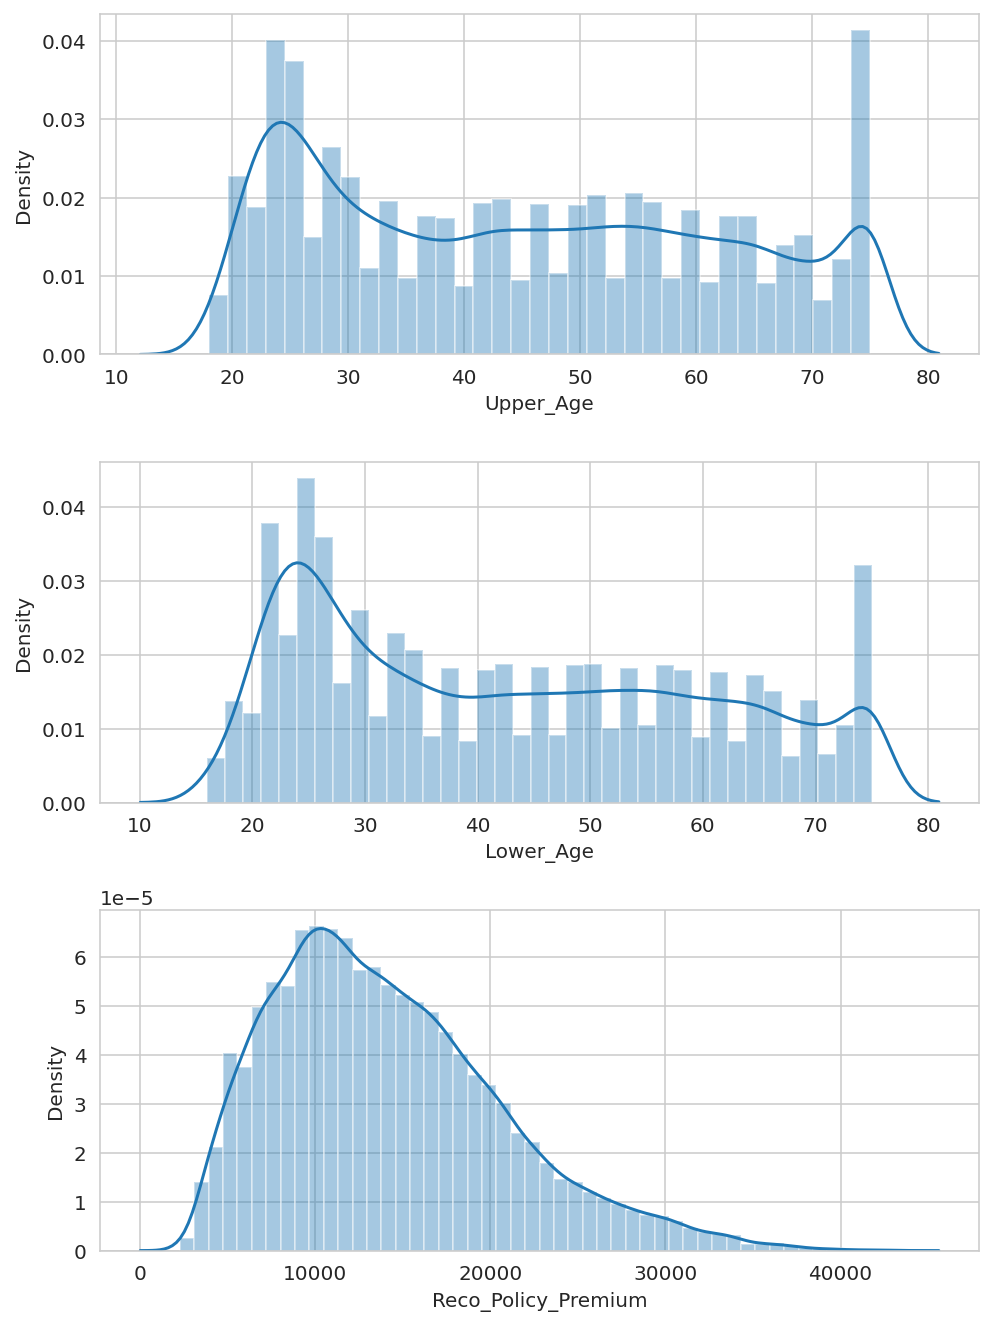

In [ ]:
# lets check distribution of continous features
# plotting histograms

plt.figure(figsize=(7,12))

for i in enumerate(continous_cols):
  plt.subplot(4,1,i[0]+1)
  sns.distplot(customer_df[i[1]])
plt.tight_layout()
plt.show()

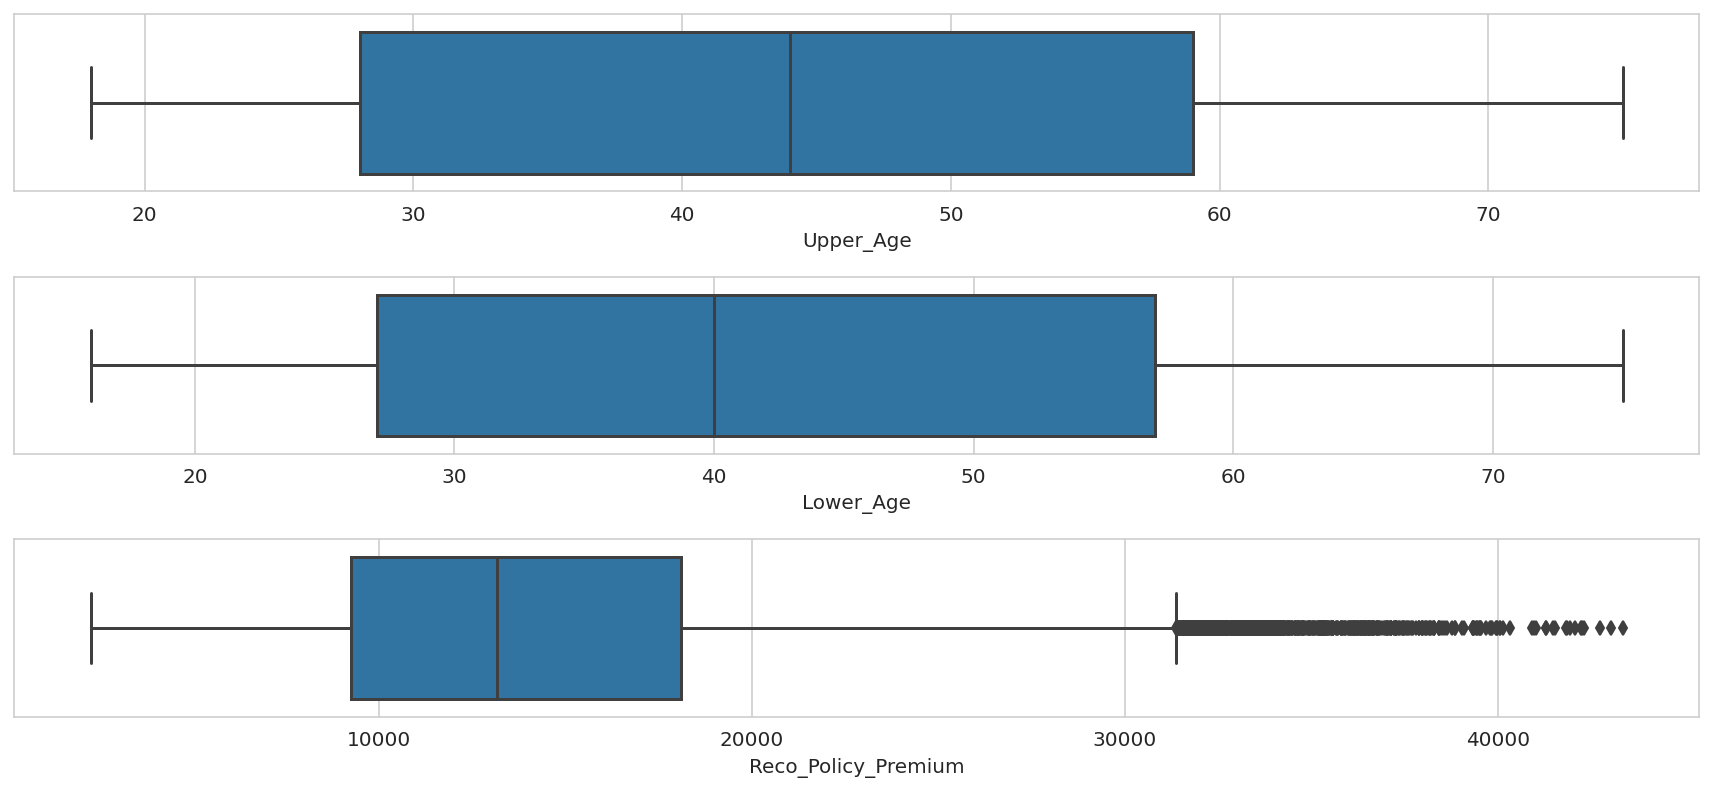

In [ ]:
# plotting box plots

plt.figure(figsize=(12,7))

for i in enumerate(continous_cols):
  plt.subplot(4,1,i[0]+1)
  sns.boxplot(customer_df[i[1]])
plt.tight_layout()
plt.show()

- Reco_Policy_Premium looks right skewed, there are some outliers present, but from boxplot we can see that, they are continous with wisker. 

- we expected to see outliers, expected to have some customers with high recommended policy premium. 

### Categorical variables

In [ ]:
cat_cols.remove('ID')
cat_cols.remove('Region_Code')

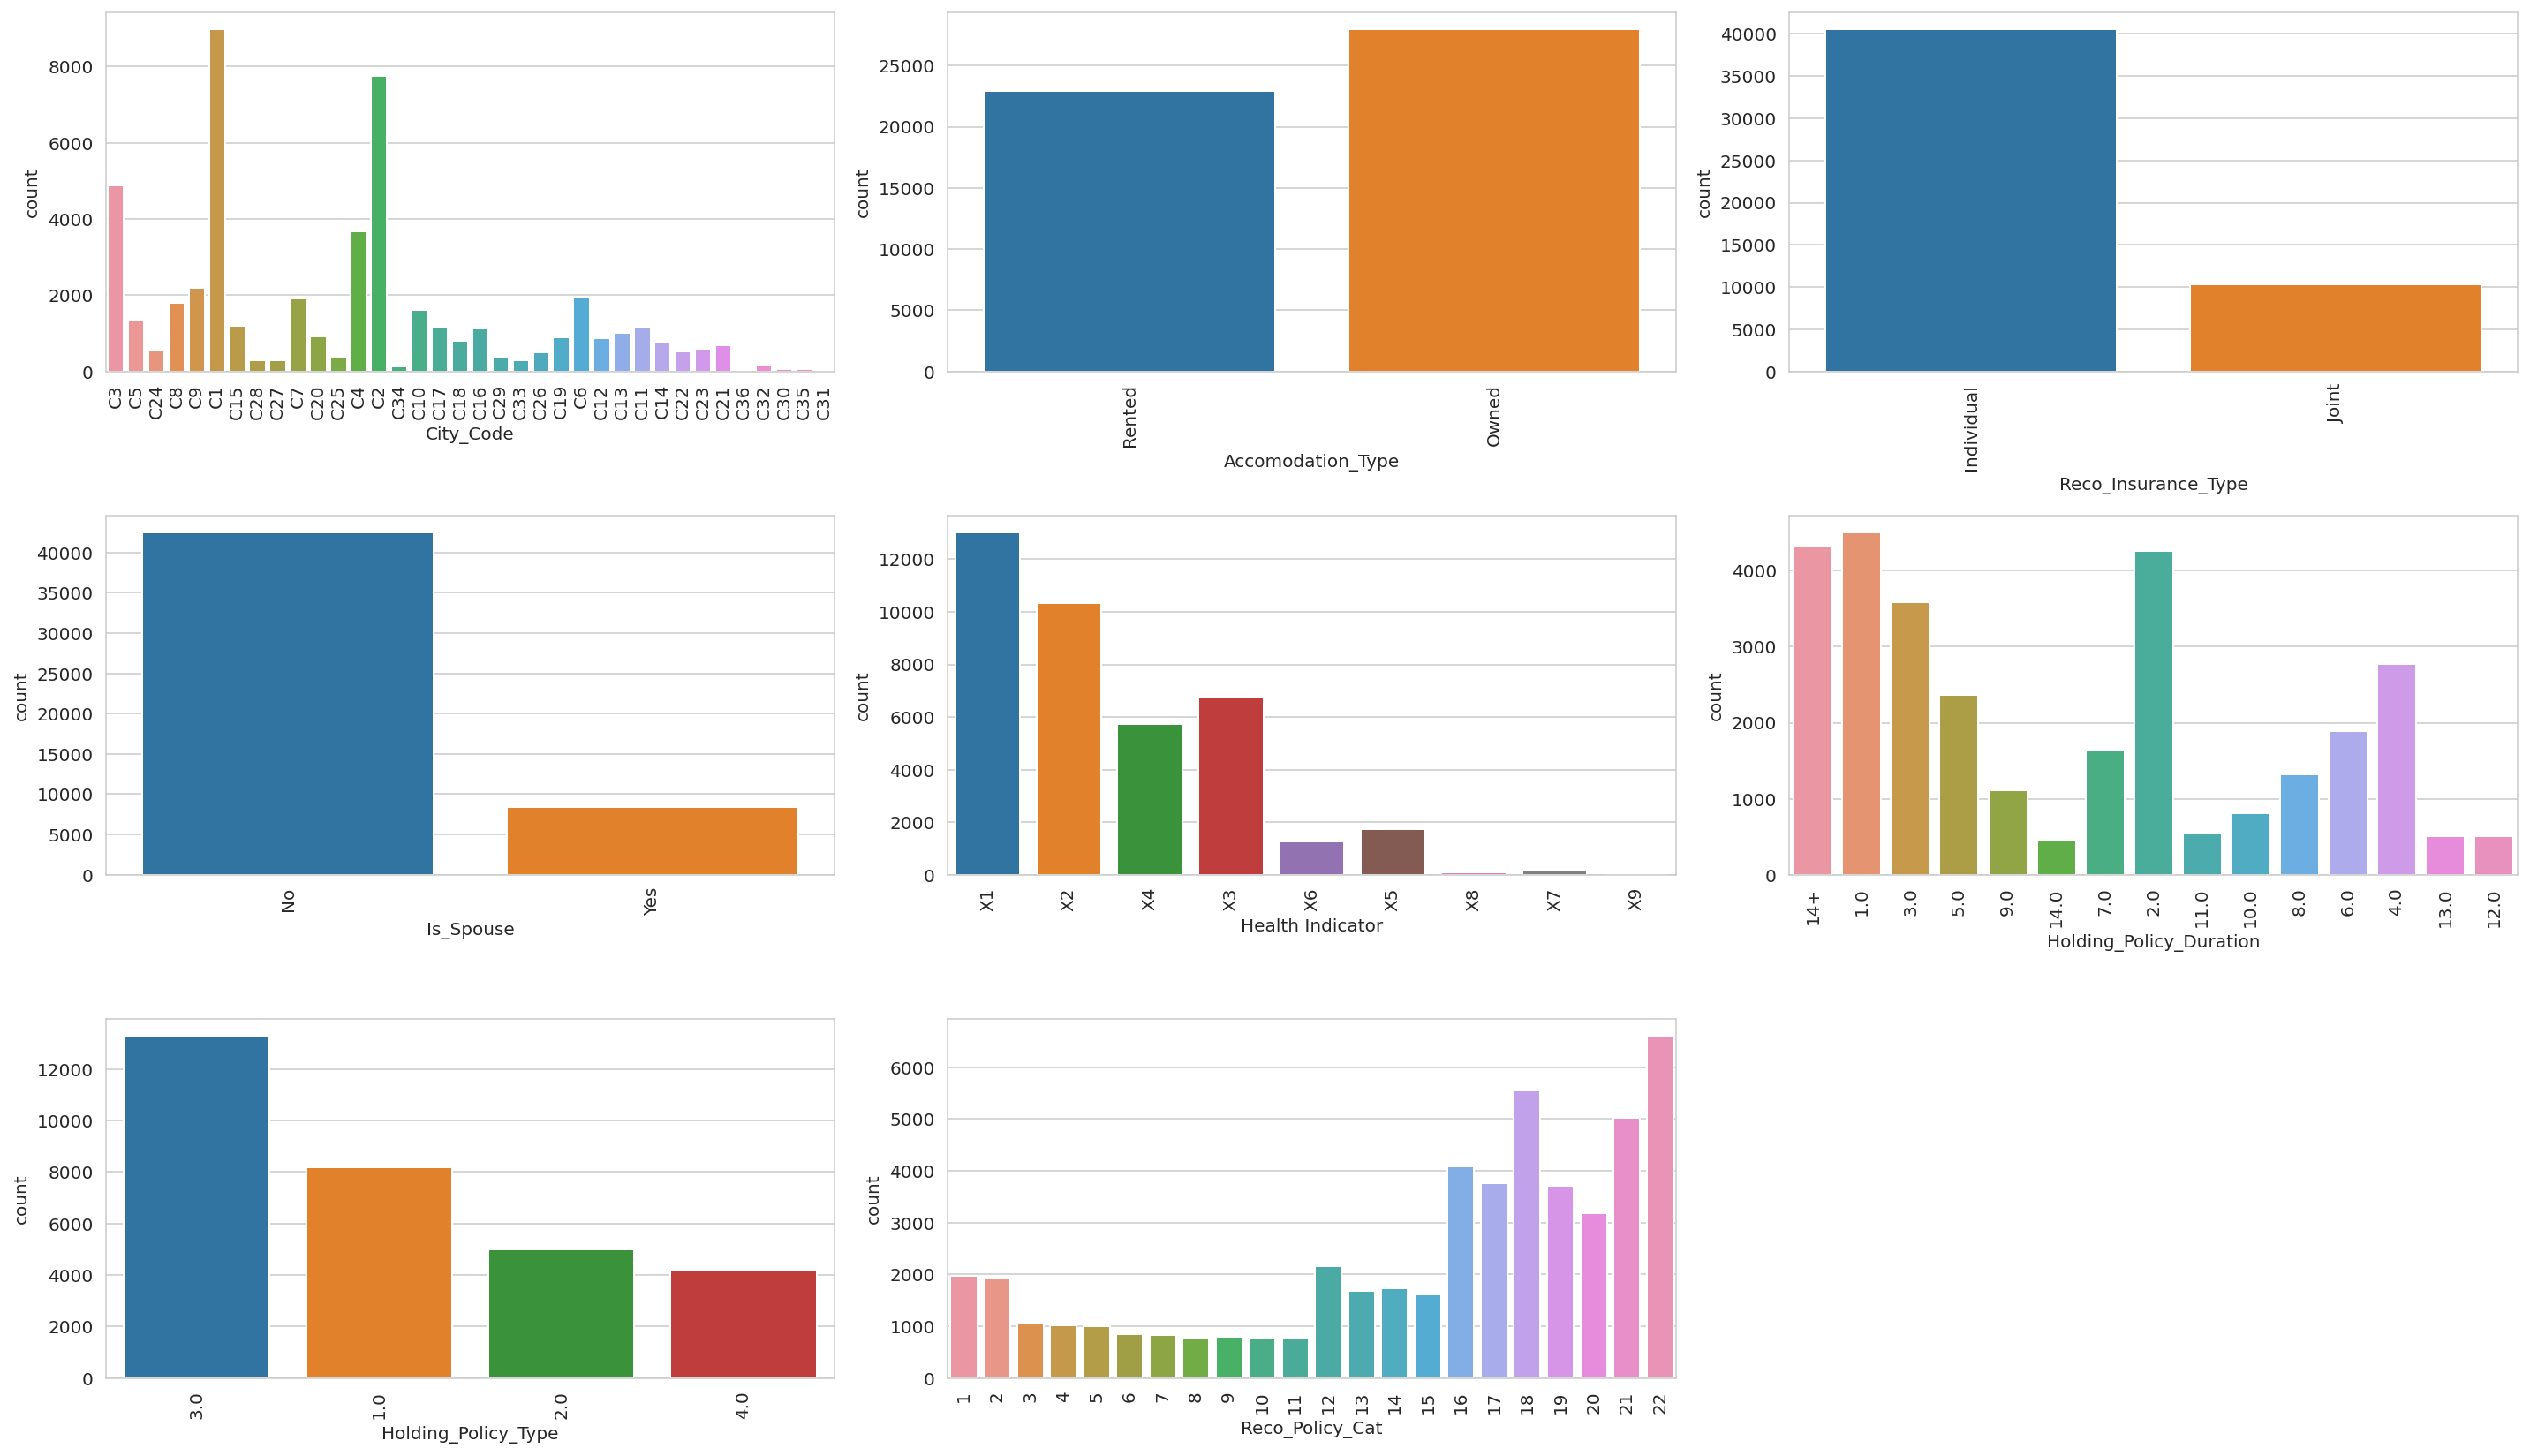

In [ ]:
# plotting count plots

plt.figure(figsize=(20,15))

for i in enumerate(cat_cols):
  plt.subplot(4,3,i[0]+1)
  sns.countplot(customer_df[i[1]])
  plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Observations:
- large numbers customers belong to C1 and C2 cities.
- majority of customers got individual recommendation.
- majority of the customers are not married
- majority customers belongs X1 and X2 health indicator category
- majority customers holds policy for 1,2,3,4,5 or 14+ years.
- majority of customers holds type 3 policy
- majorty customers got recommendation of policy from 16 to 22 types.

# Bi-variate Analysis

### continuous variables

In [ ]:
customer_df[continous_cols].head()

,Upper_Age,Lower_Age,Reco_Policy_Premium
0,36,36,11628.0
1,75,22,30510.0
2,32,32,7450.0
3,52,48,17780.0
4,44,44,10404.0


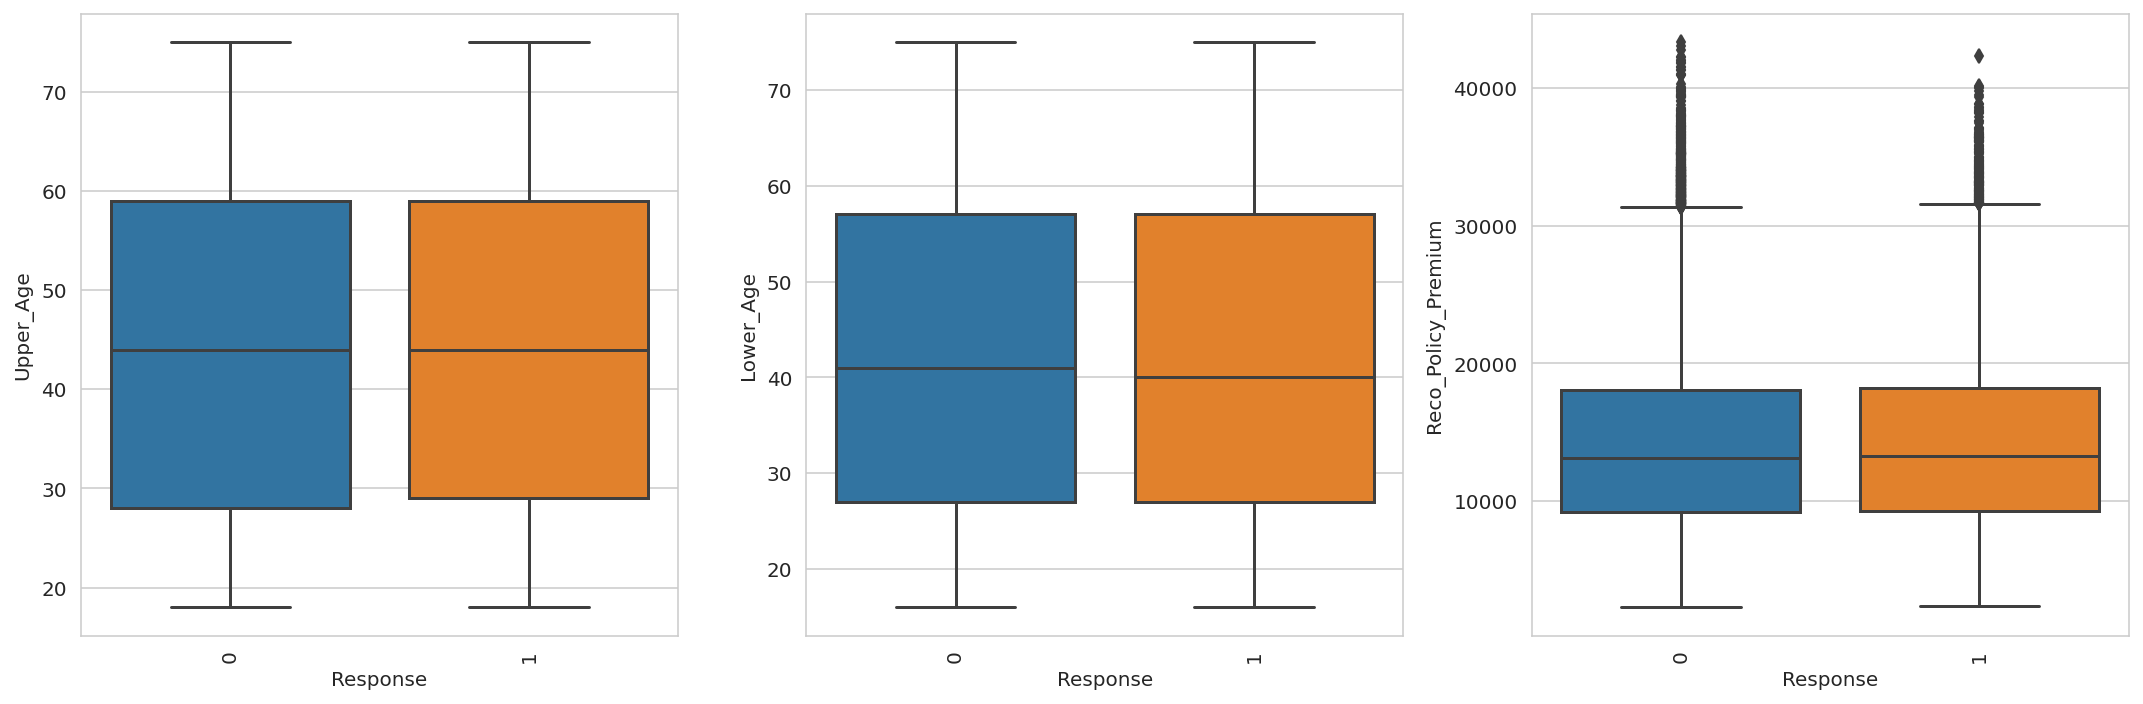

In [ ]:
# lets see how individual variables affects on target 

# plotting box plots

plt.figure(figsize=(15,5))

for i in enumerate(continous_cols):
  plt.subplot(1,3,i[0]+1)
  sns.boxplot(x= customer_df.Response, y=customer_df[i[1]])
  plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

none of the continous variable impacting the target variable. medians for all responses looks same 

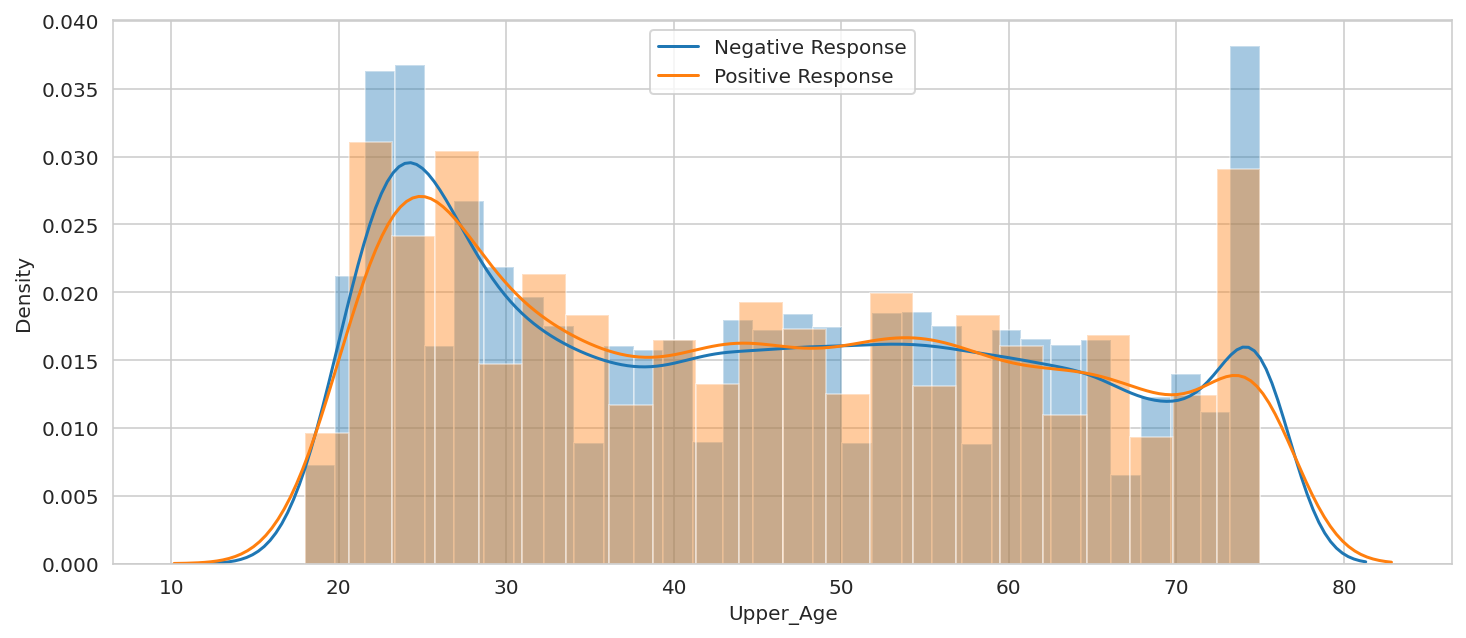

In [ ]:
# checking distributions of age wtr. positive and negative response
plt.figure(figsize=(12,5))

sns.distplot(customer_df[customer_df['Response']==0]['Upper_Age'])

sns.distplot(customer_df[customer_df['Response']==1]['Upper_Age'])

plt.legend(['Negative Response', 'Positive Response'])

There is a thin seperation, more of too young and too old customer give negative response

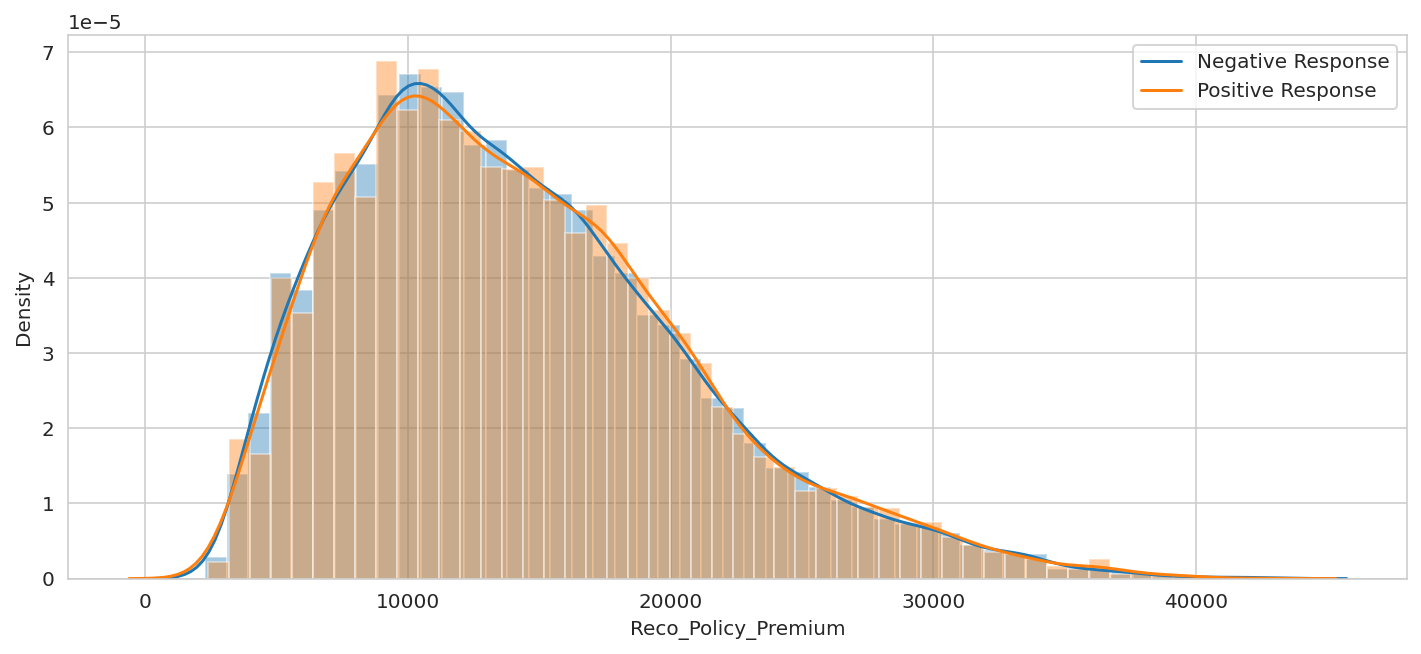

In [ ]:
# checking distributions of policy premium amount wtr. positive and negative response

plt.figure(figsize=(12,5))

sns.distplot(customer_df[customer_df['Response']==0]['Reco_Policy_Premium'])

sns.distplot(customer_df[customer_df['Response']==1]['Reco_Policy_Premium'])

plt.legend(['Negative Response', 'Positive Response'])

cant see any seperation.

### categorical variables

In [ ]:
def respone_cat(column):
    plt.figure(figsize=(20,5))
    
    # conversion for each category 
    plt.subplot(1,2,1)
    sns.countplot(x=column, hue="Response", data=customer_df)
    plt.xticks(rotation = 'vertical')
    
    # conversion percentage for each category
    plt.subplot(1,2,2)
    sns.barplot(x=column ,y='Response',data = round(100*customer_df.groupby(column)['Response'].mean()).reset_index())
    plt.xticks(rotation = 'vertical')
    
    return plt.show()

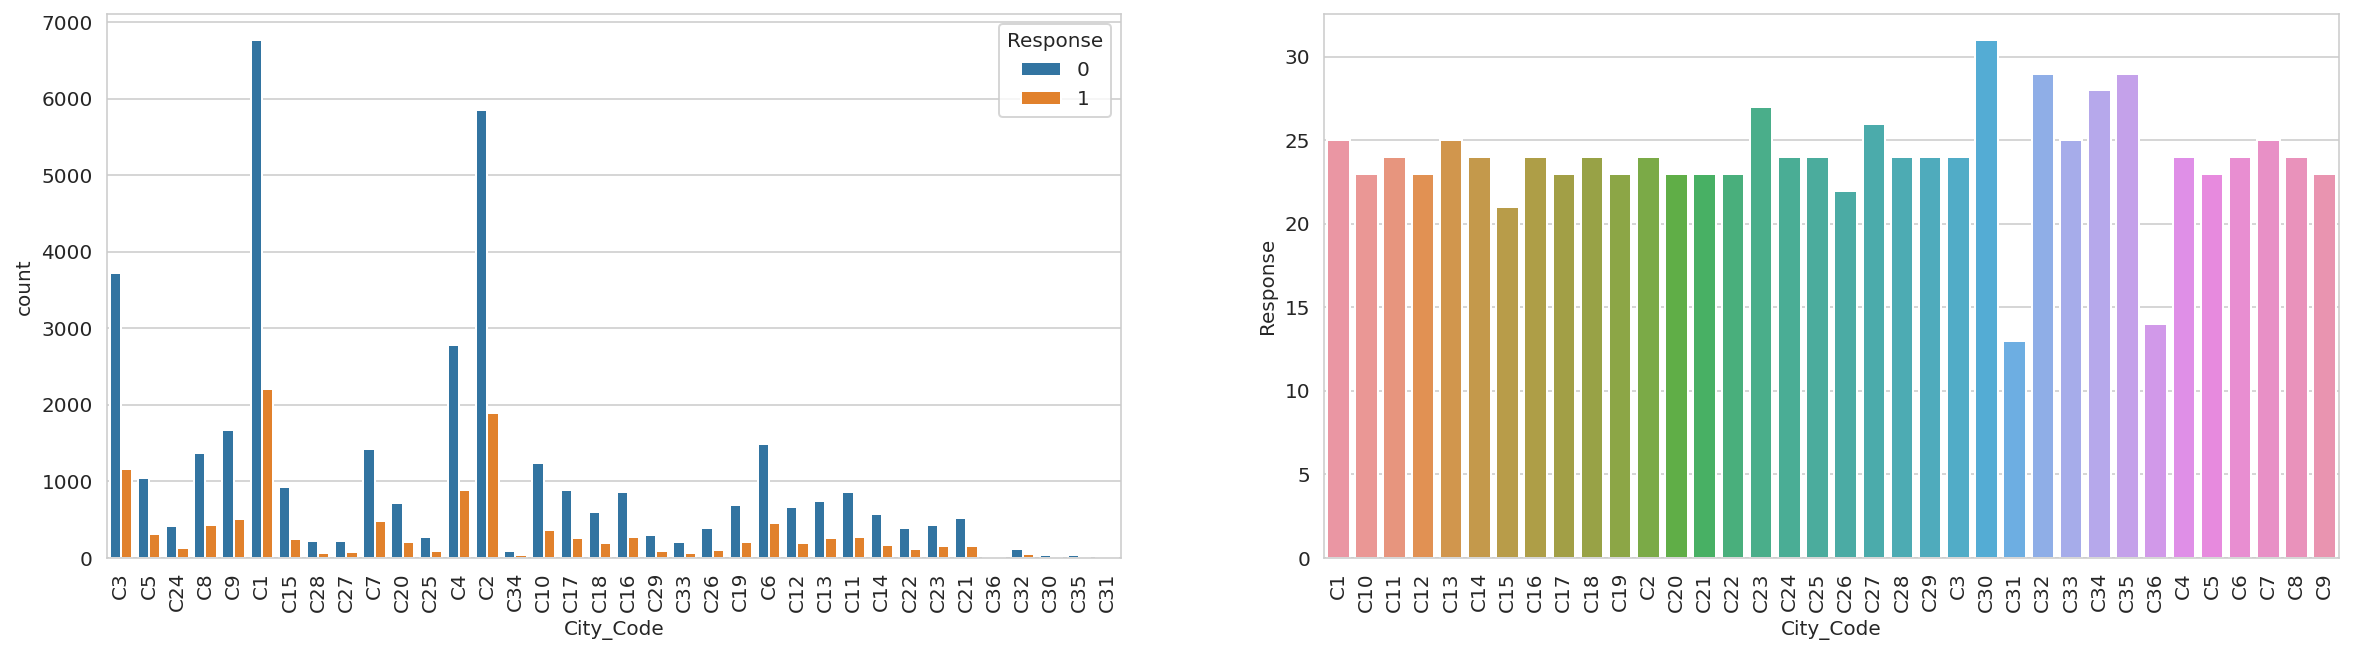

In [ ]:
respone_cat('City_Code')

number of positive resonses from C1 and C2 city is high, and conversion rate is also near 25%. quite decent if we compare it with other cities.

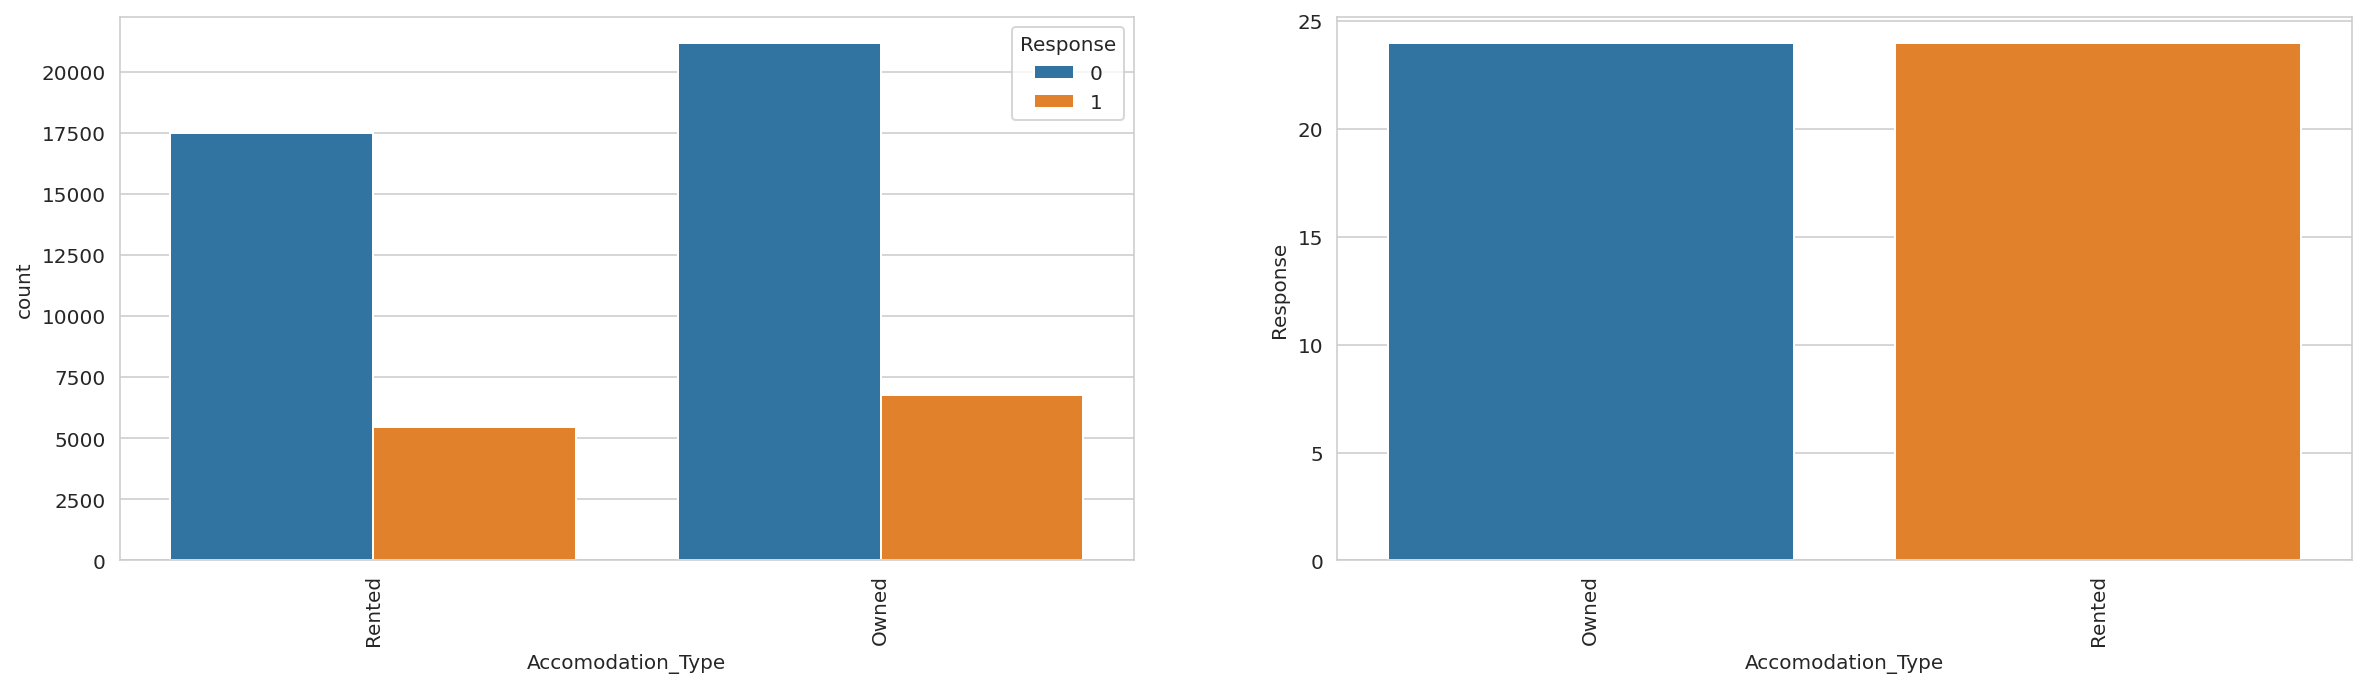

In [ ]:
respone_cat('Accomodation_Type')

number of positive resonses are little bit high from customers with owned accomodation, compare to rented ones. but the conversion rate is very similar. 

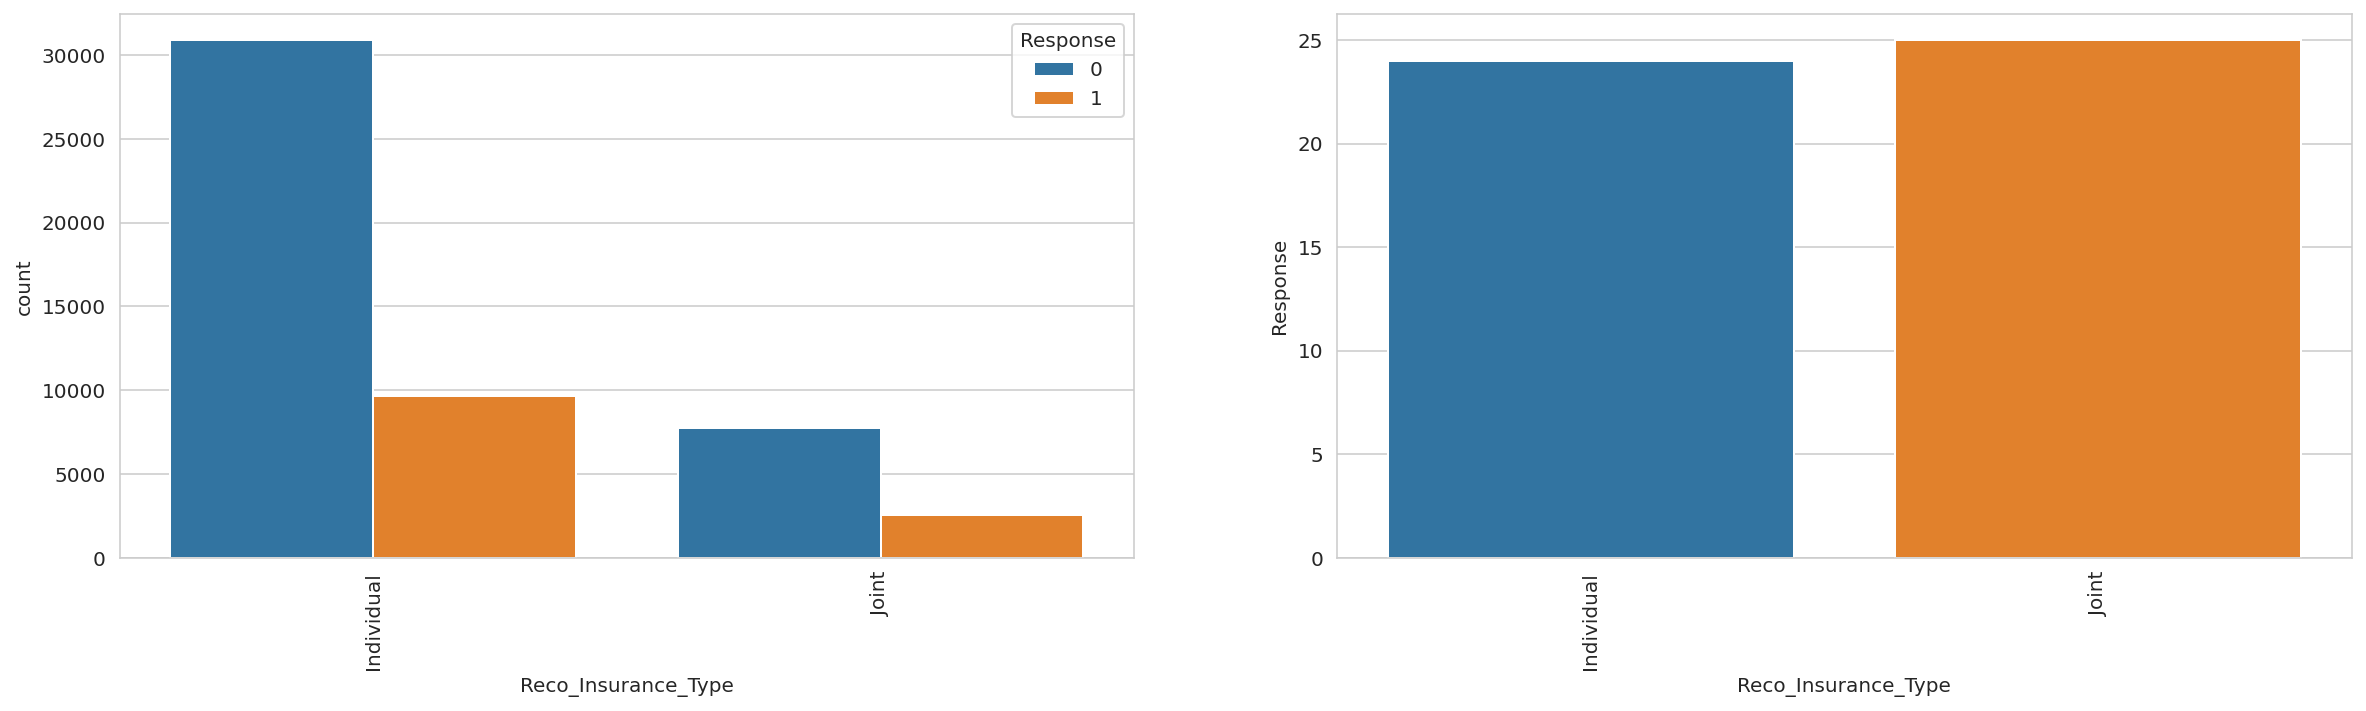

In [ ]:
respone_cat('Reco_Insurance_Type')

number of positive resonses are high from customers with individual recommendation, compare to joint ones. but the conversion rate is very similar.

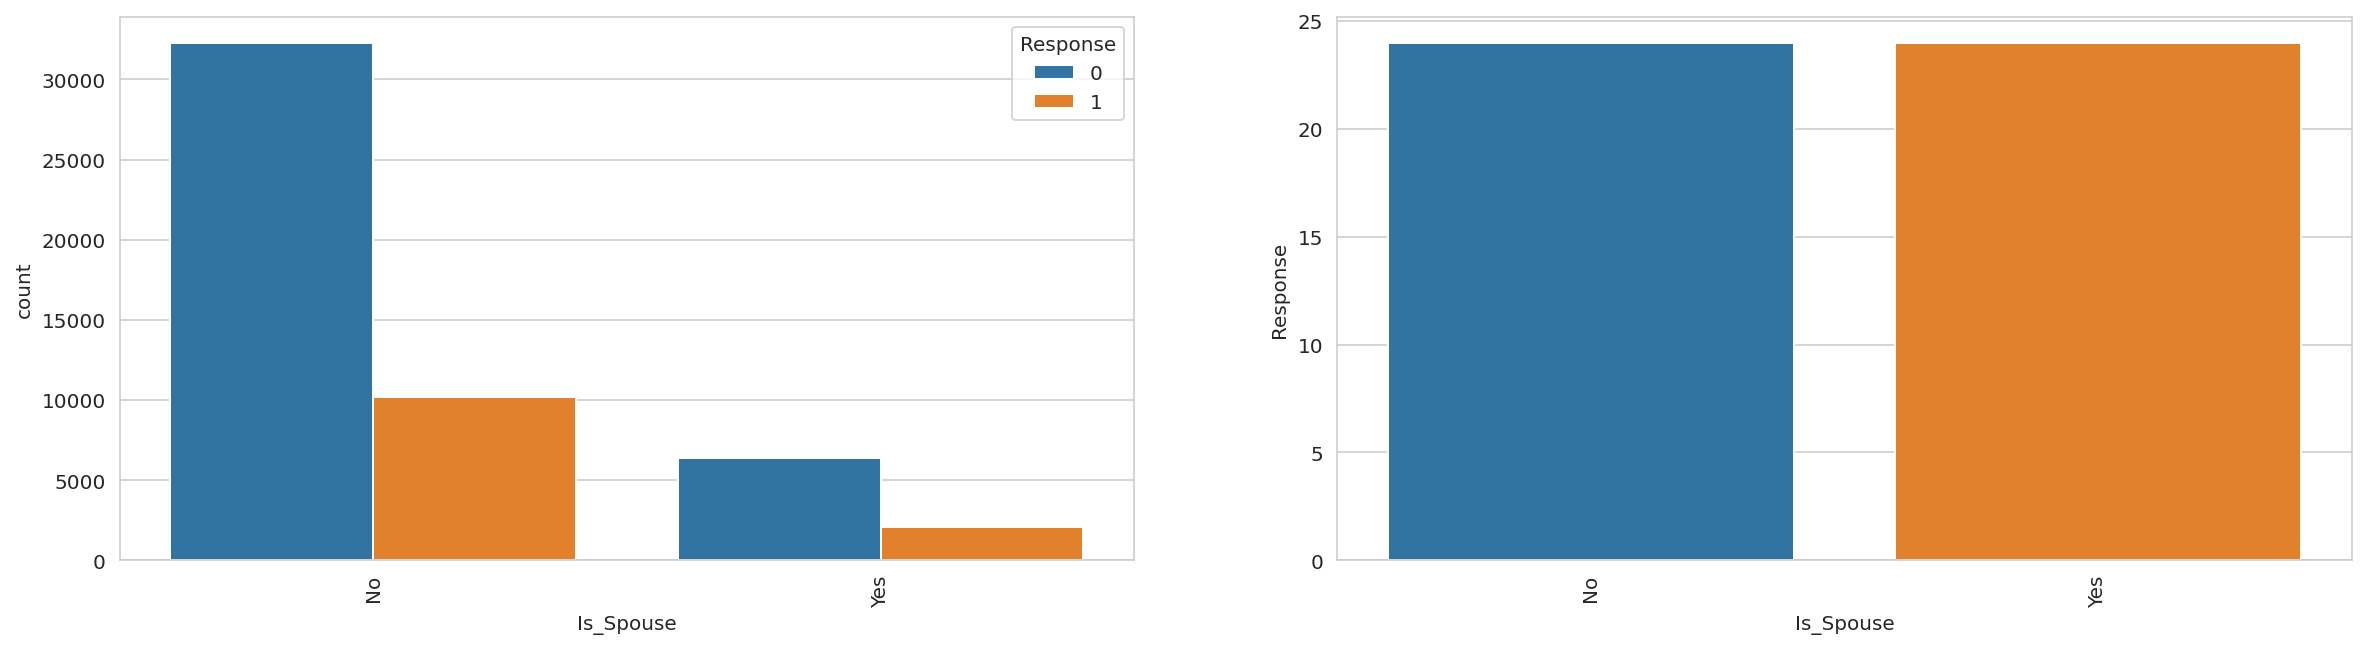

In [ ]:
respone_cat('Is_Spouse')

number of positive resonses are high from single customers, compare to married ones. but the conversion rate is very similar.

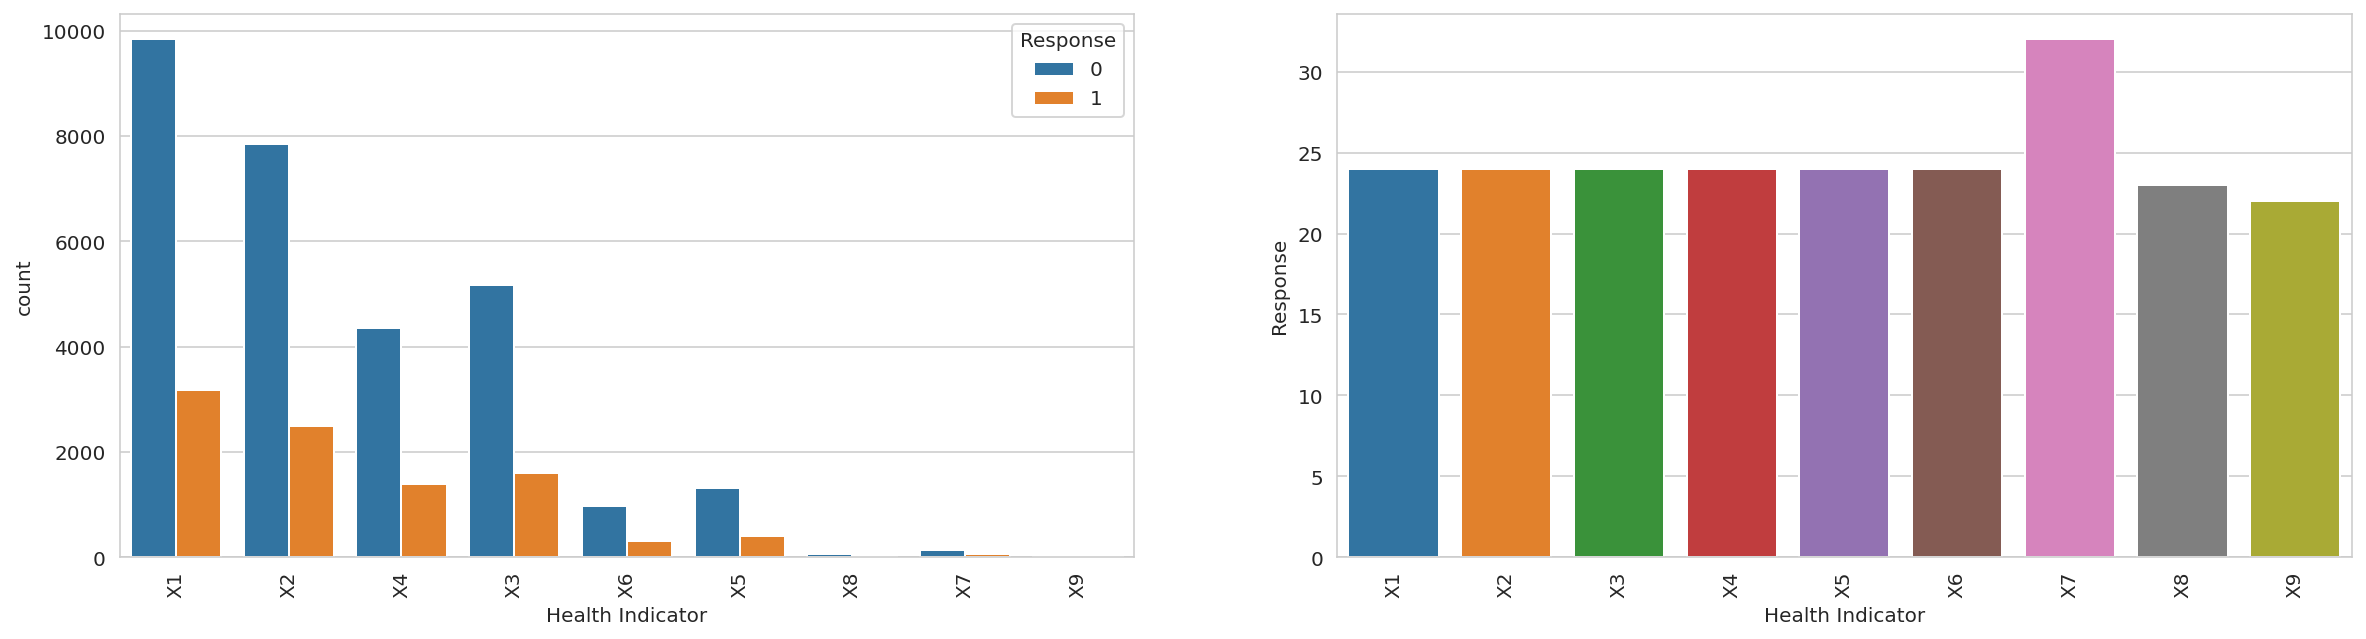

In [ ]:
respone_cat('Health Indicator')

number of positive resonses from X1 and X2 category is high, and conversion rate is also near 25%. quite decent if we compare it with other categories.

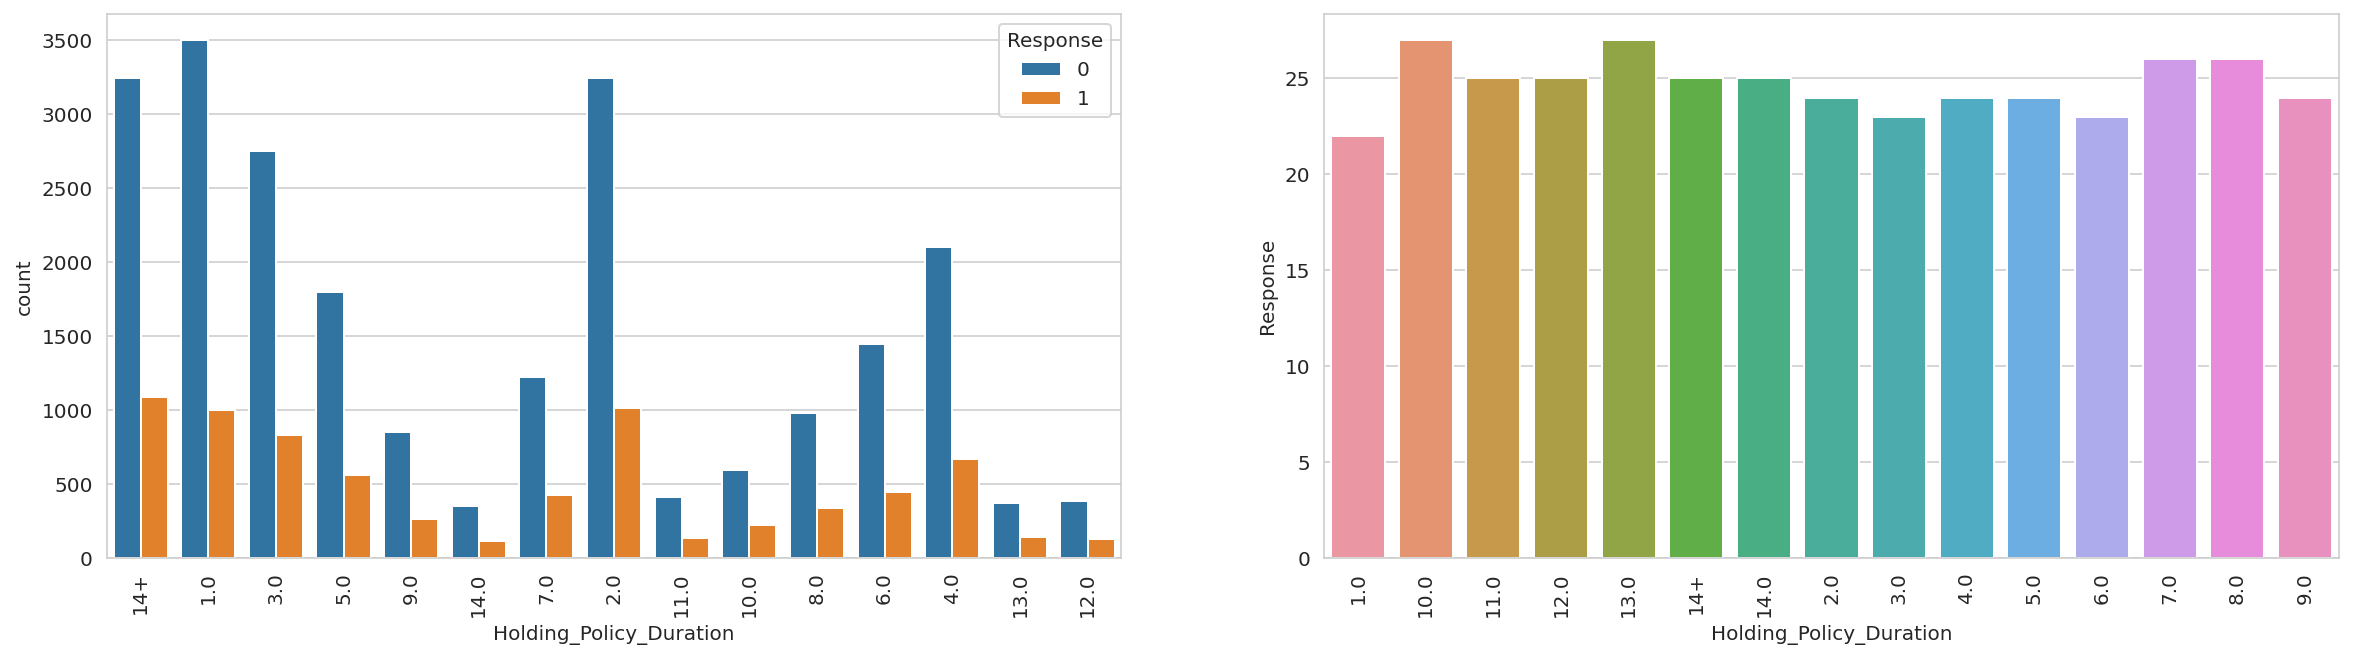

In [ ]:
respone_cat('Holding_Policy_Duration')

more positive responses from a customer holding another policy for +14, 1, 2,3 years. conversion Rate is also good for these categories, above 20%.

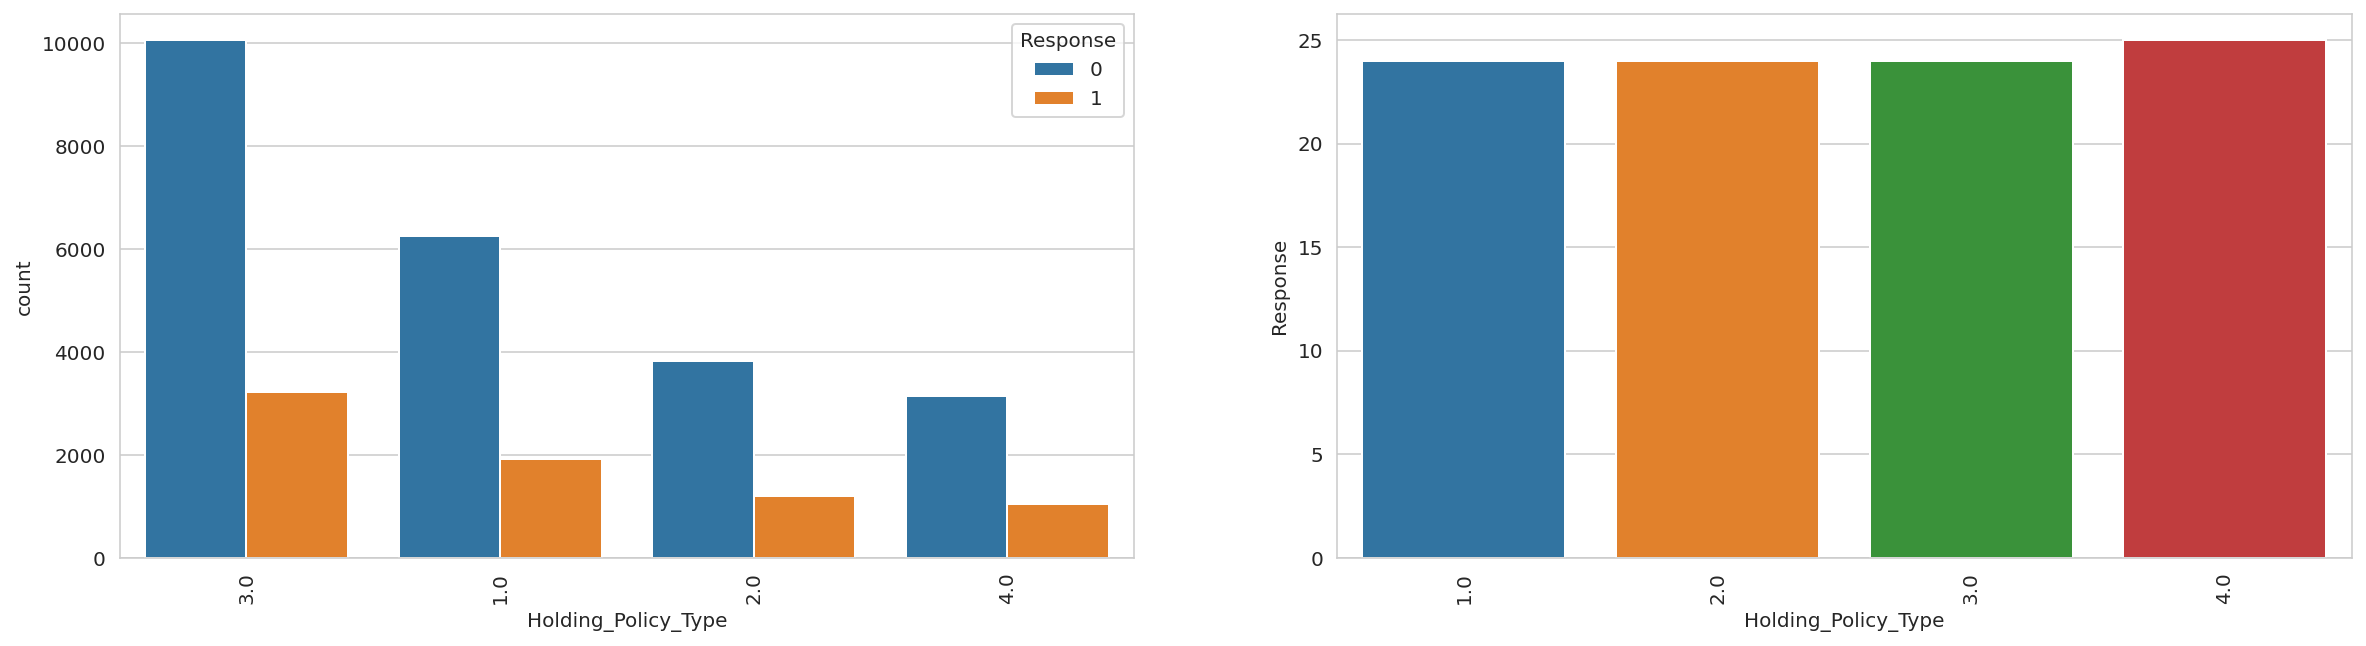

In [ ]:
respone_cat('Holding_Policy_Type')

customer holdig policy type 3 have more positive response. conversion rate of all categories looks same. above 20%.

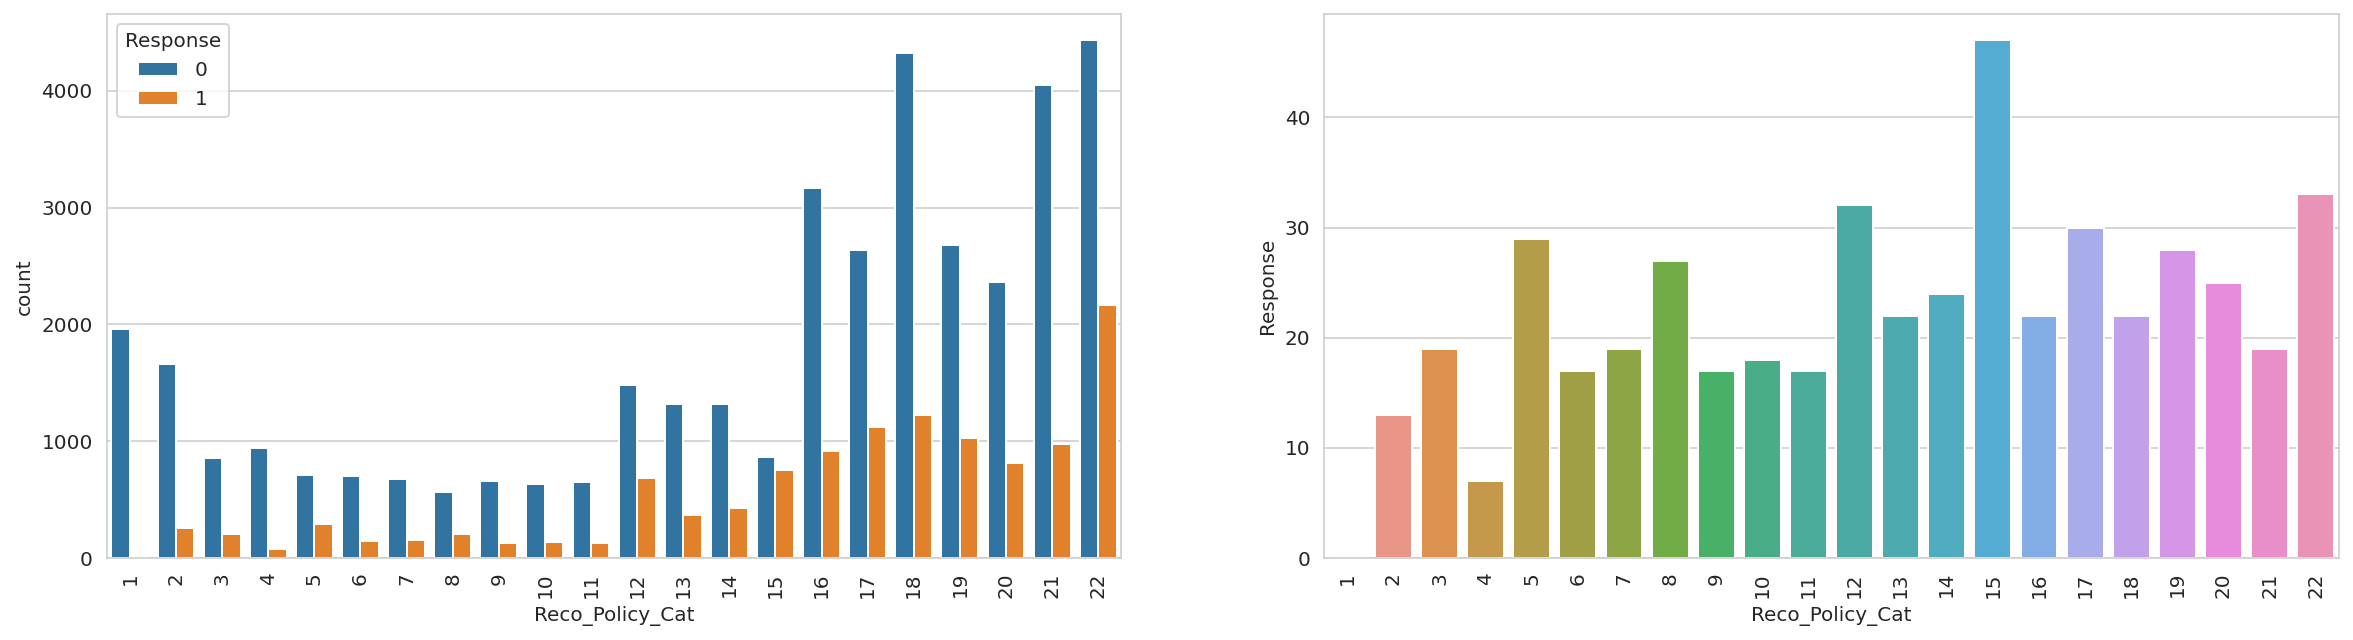

In [ ]:
respone_cat('Reco_Policy_Cat')

Recommended policy no. 22 have high positive responses. conversion rate is also quite high for policy no. 22, above 30%. policy no.15 have conversion rate about 45%.

## Multivariate Analysis

In [ ]:
customer_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1,16,10404.0,0


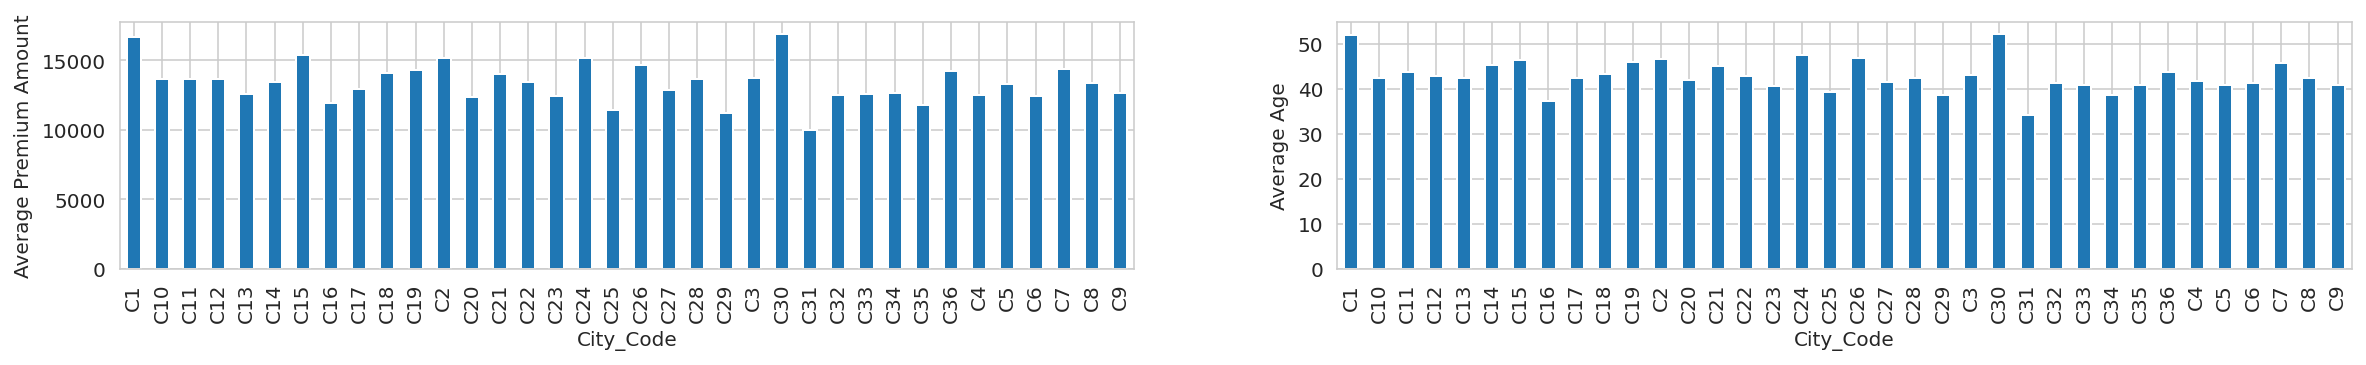

In [ ]:
# lets check for on an averae premium amount for each city and is there any realtion of premium amount with age?

plt.figure(figsize=(20,5))

plt.subplot(2,2,1)
customer_df.groupby('City_Code')['Reco_Policy_Premium'].mean().round().plot(kind='bar')
plt.ylabel('Average Premium Amount')

plt.subplot(2,2,2)
customer_df.groupby('City_Code')['Upper_Age'].mean().plot(kind='bar')
plt.ylabel('Average Age')
plt.show()


- we can see that, on an average premium amount of c1 and c30 city are high, and on an average Age of customers of C1 and C30 city is above 50.

- maybe at higher age health risk is high, and thats why high premium.

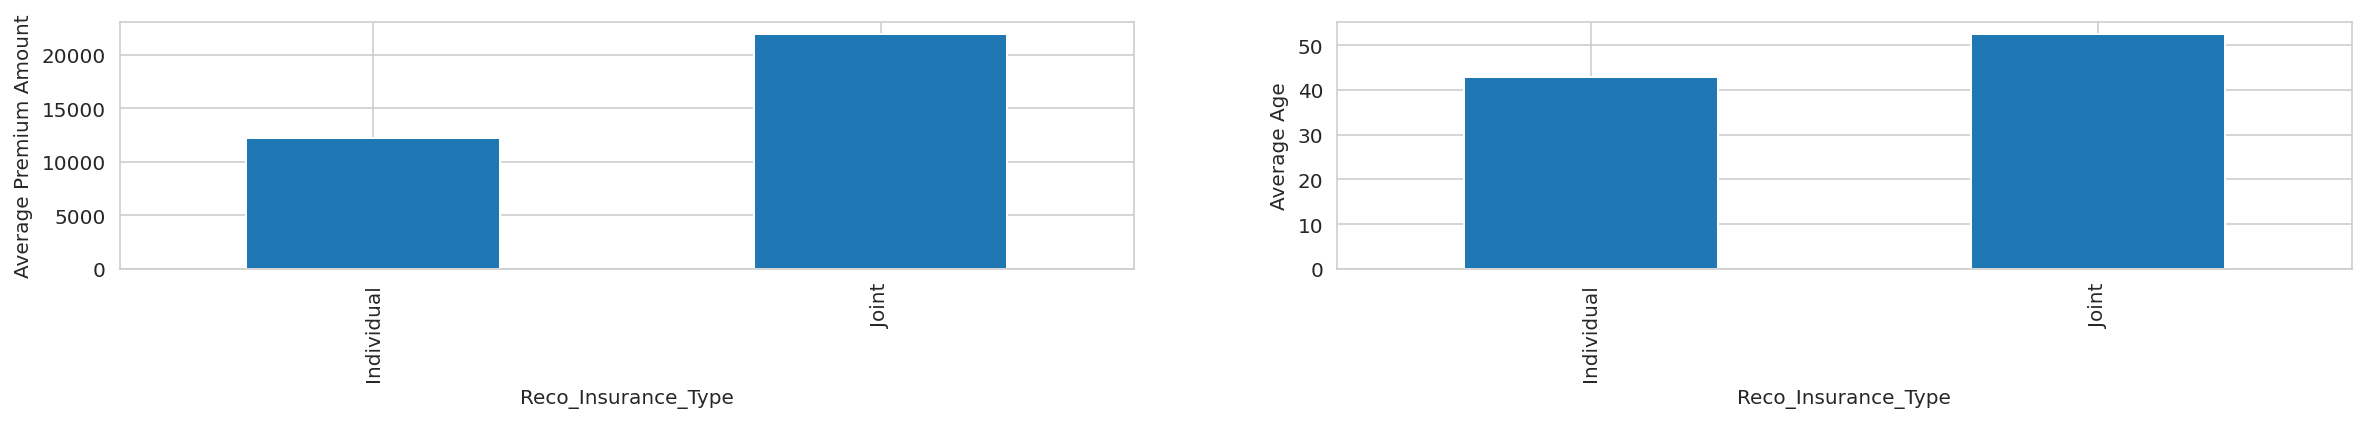

In [ ]:
# lets check for how Insurance type behaves with premium amount age of customers
plt.figure(figsize=(20,5))

plt.subplot(2,2,1)
customer_df.groupby('Reco_Insurance_Type')['Reco_Policy_Premium'].mean().round().plot(kind='bar')
plt.ylabel('Average Premium Amount')

plt.subplot(2,2,2)
customer_df.groupby('Reco_Insurance_Type')['Upper_Age'].mean().plot(kind='bar')
plt.ylabel('Average Age')
plt.show()

- we can see that, recommended avg. premium amount for joint customers are very high compare to individual one.
- avg. age of customer in joint type is high comare to individual type ones. 

Text(0, 0.5, 'Average Premium Amount')

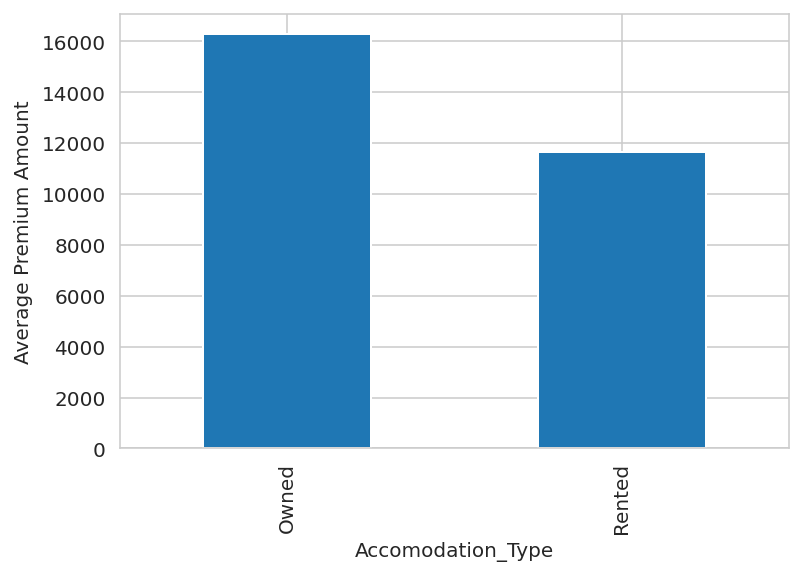

In [ ]:
customer_df.groupby('Accomodation_Type')['Reco_Policy_Premium'].mean().round().plot(kind='bar')
plt.ylabel('Average Premium Amount')

Customer who owned accomodation, get on an average high recommendation premium amount. 

Text(0, 0.5, 'Average Premium Amount')

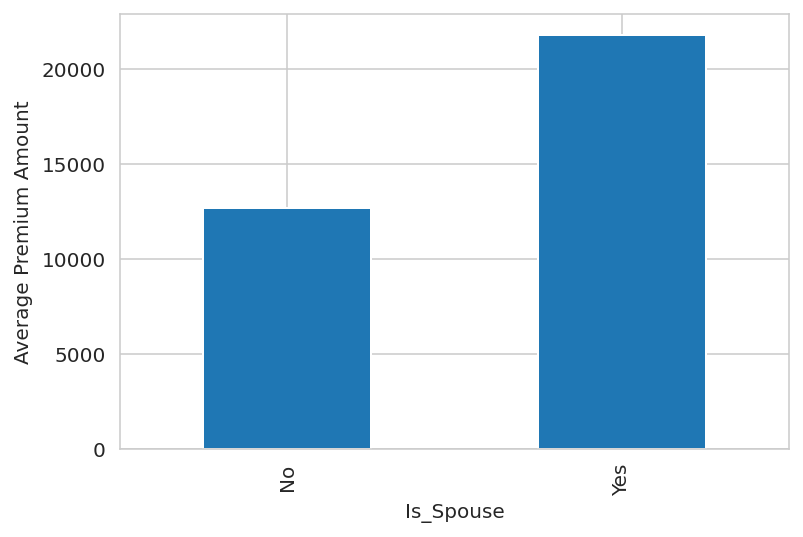

In [ ]:
customer_df.groupby('Is_Spouse')['Reco_Policy_Premium'].mean().round().plot(kind='bar')
plt.ylabel('Average Premium Amount')

customer who is married get on an average high recommendation premium amount.

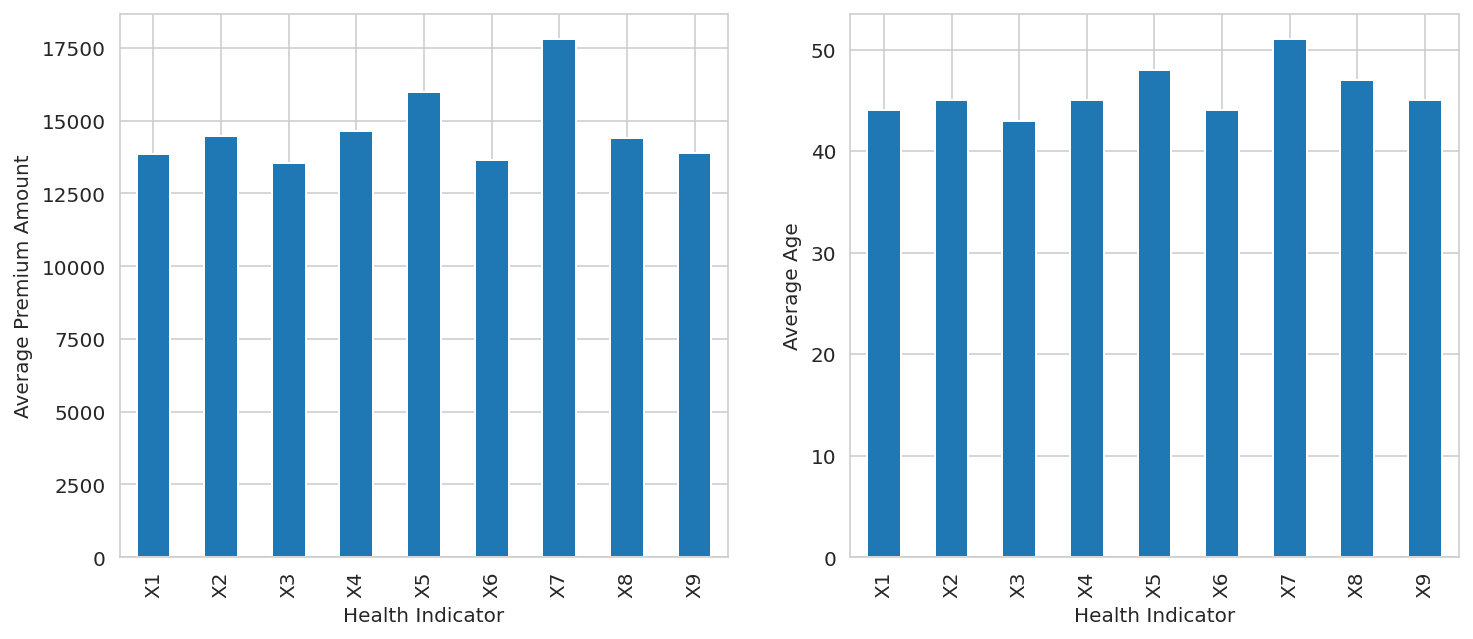

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
customer_df.groupby('Health Indicator')['Reco_Policy_Premium'].mean().round().plot(kind='bar')
plt.ylabel('Average Premium Amount')

plt.subplot(1,2,2)
customer_df.groupby('Health Indicator')['Upper_Age'].mean().round().plot(kind='bar')
plt.ylabel('Average Age')

plt.show()

we can see that, customer with X7 health indicator have on an average high recommended premium amount. also the average age of customers with X7 indicator is above 50 years.

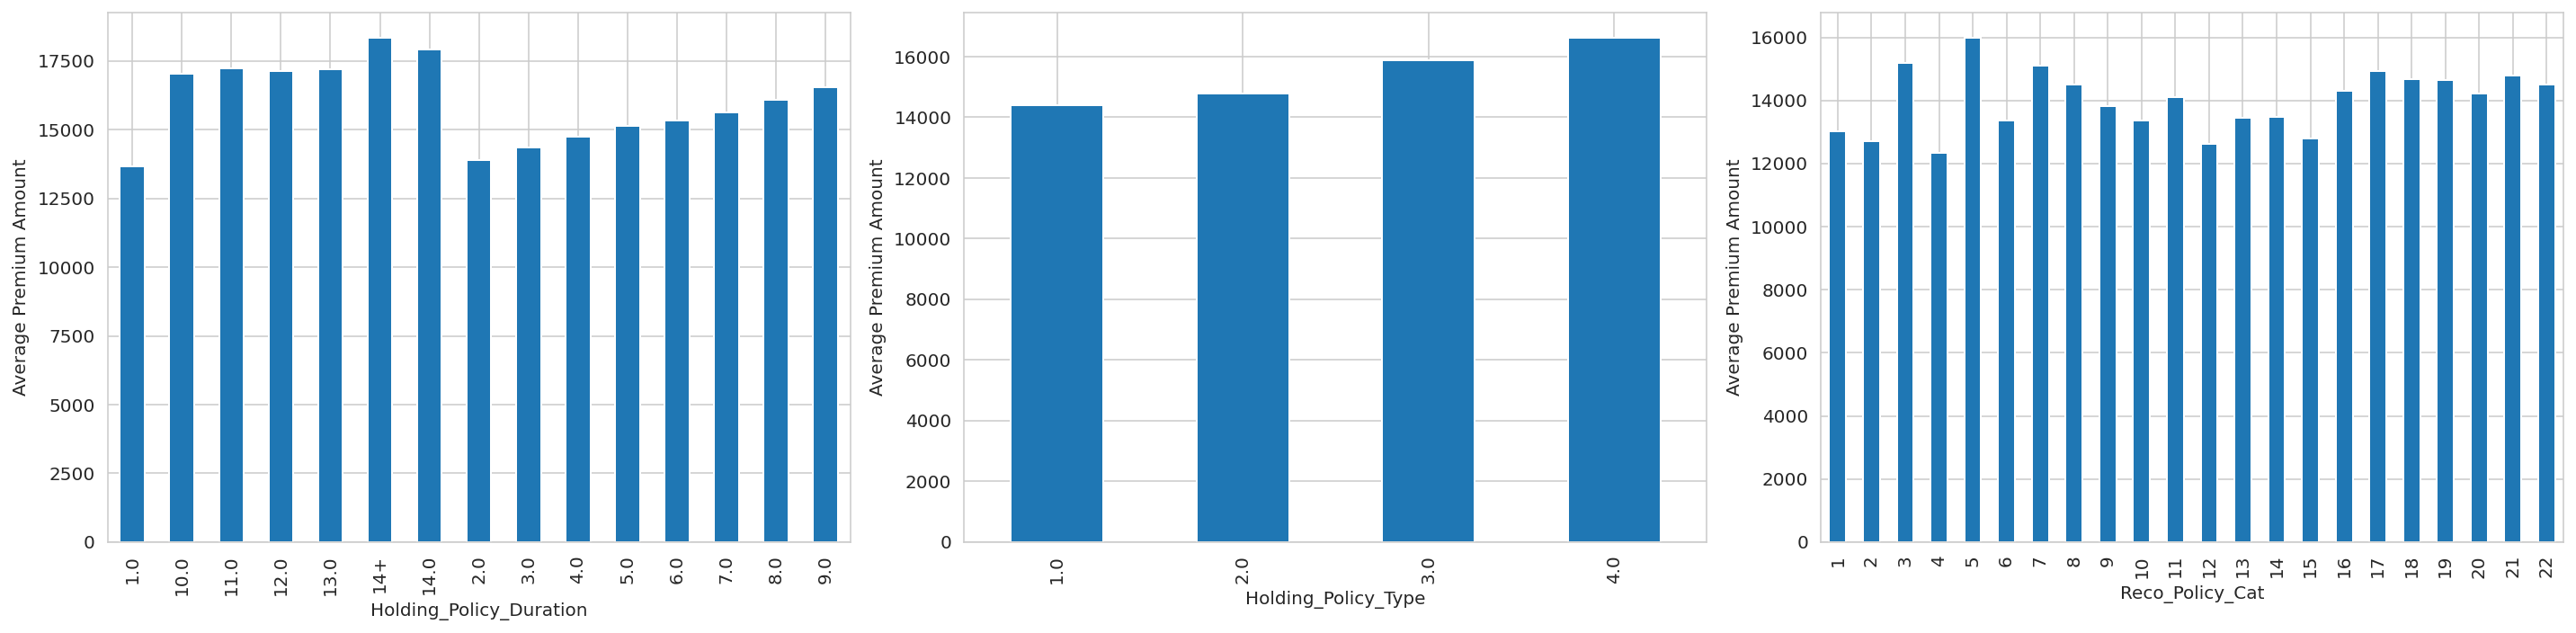

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
customer_df.groupby('Holding_Policy_Duration')['Reco_Policy_Premium'].mean().round().plot(kind='bar')
plt.ylabel('Average Premium Amount')

plt.subplot(1,3,2)
customer_df.groupby('Holding_Policy_Type')['Reco_Policy_Premium'].mean().round().plot(kind='bar')
plt.ylabel('Average Premium Amount')

plt.subplot(1,3,3)
customer_df.groupby('Reco_Policy_Cat')['Reco_Policy_Premium'].mean().round().plot(kind='bar')
plt.ylabel('Average Premium Amount')


plt.tight_layout()
plt.show()

- customers with 14+ year of holding other policy, got an on avg. high amount premium amount recommendation.
- customers holding policy type 4 get high on an ave hih amount recommendation.
-type 5 recommended policy looks expensive.

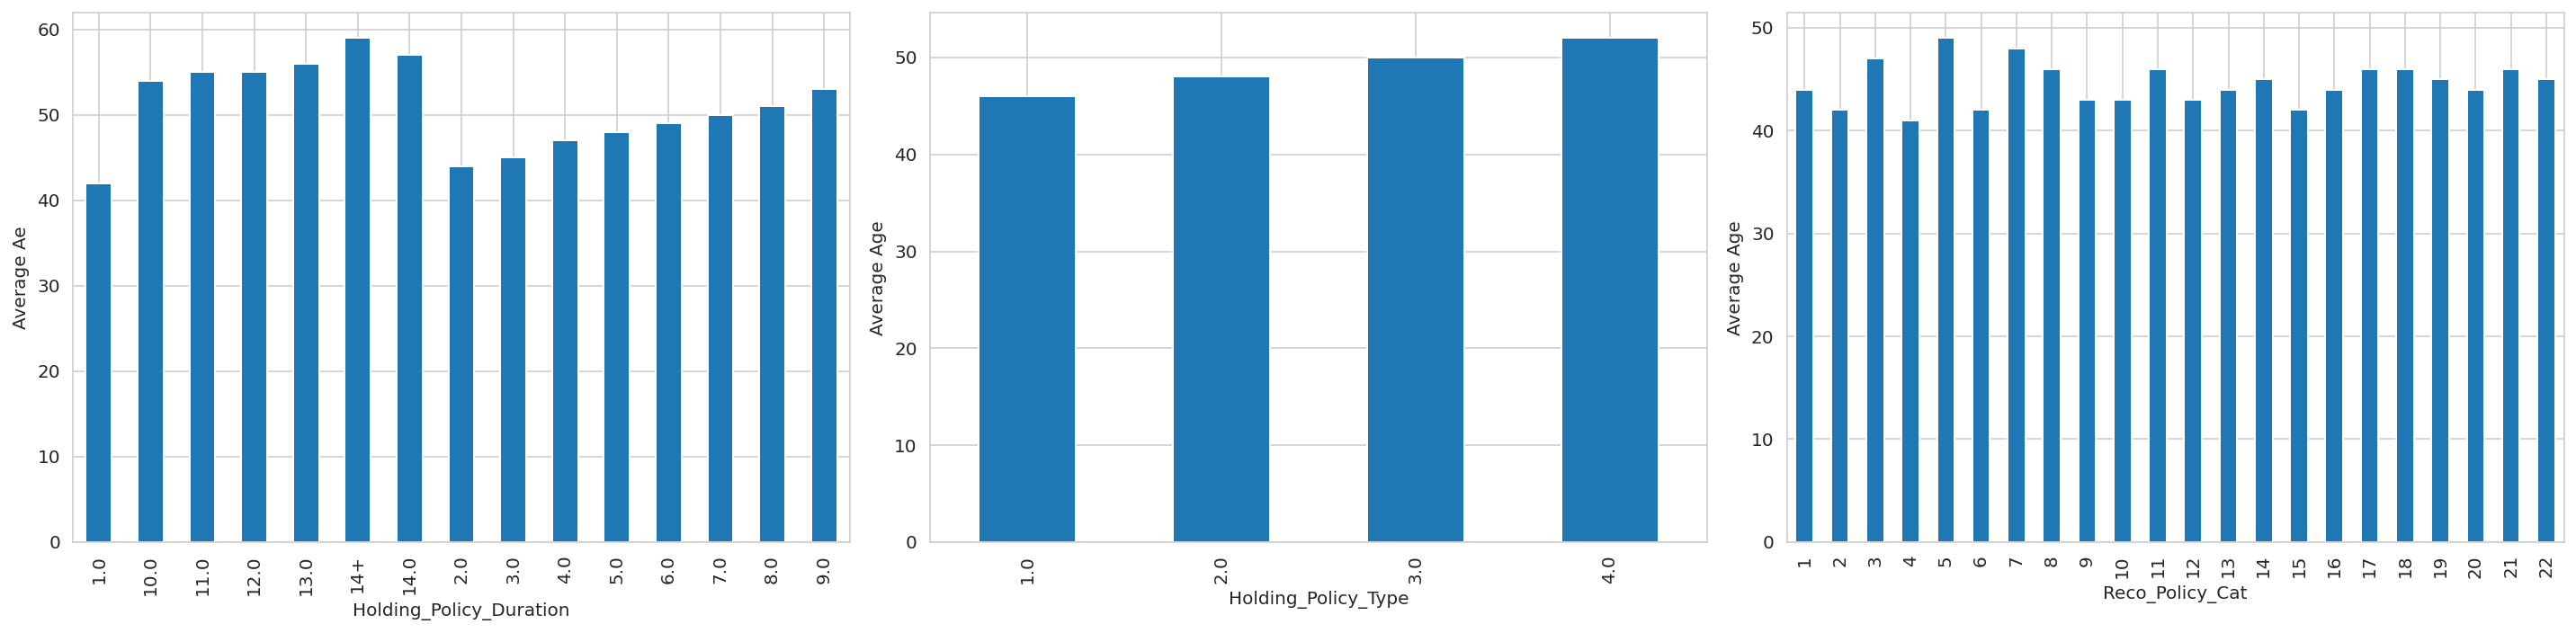

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
customer_df.groupby('Holding_Policy_Duration')['Upper_Age'].mean().round().plot(kind='bar')
plt.ylabel('Average Ae')

plt.subplot(1,3,2)
customer_df.groupby('Holding_Policy_Type')['Upper_Age'].mean().round().plot(kind='bar')
plt.ylabel('Average Age')

plt.subplot(1,3,3)
customer_df.groupby('Reco_Policy_Cat')['Upper_Age'].mean().round().plot(kind='bar')
plt.ylabel('Average Age')


plt.tight_layout()
plt.show()

- on an avg. oldest customers above 50 years have holding for 9+ years duration.
- younger one holds policy for duration of 1 or 2 years.
-  oldest customers holds type 4 holding policy.
- younger one holds type 1 of holdig policy.
- customers who got type 5 recommendation are on an avg. oldest customers.